In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee'])

# Increase font sizes manually
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data_cleaning/data/imputed_data_v2.csv')
df.rename({'person': 'participant'}, axis='columns', inplace=True)

## 1. Heart Rate

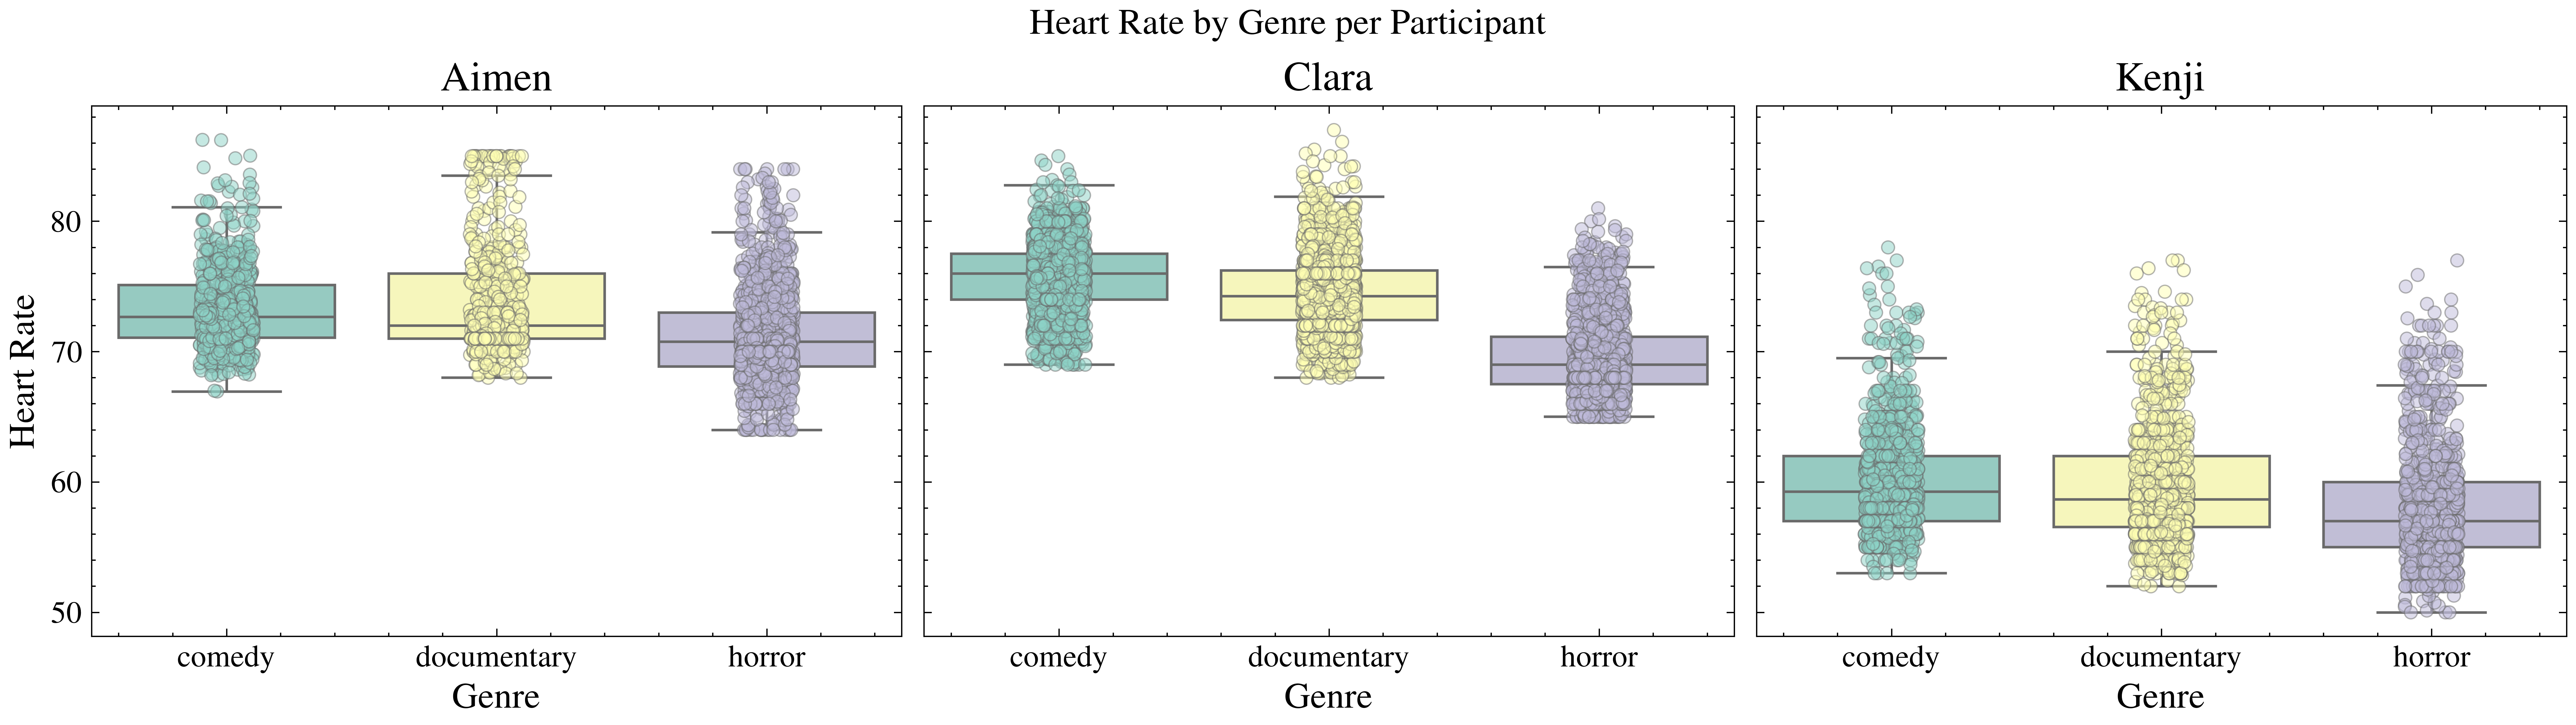

In [3]:
def plot_hr():
    participants = df['participant'].unique()
    genres = df['genre'].unique()
    
    fig, axes = plt.subplots(1, len(participants), figsize=(14, 4), sharey=True)
    
    for ax, participant in zip(axes, participants):
        sns.boxplot(
            data=df[df['participant'] == participant],
            x='genre',
            y='heart_rate',
            palette='Set3',
            showfliers=False,
            ax=ax
        )
    
        sns.stripplot(
            data=df[df['participant'] == participant],
            x='genre',
            y='heart_rate',
            palette='Set3',
            alpha=0.5,
            linewidth=0.5,
            edgecolor='gray',
            ax=ax
        )
    
        ax.set_title(f"{participant.capitalize()}")
        ax.set_xlabel('Genre')
        if ax == axes[0]:
            ax.set_ylabel('Heart Rate')
        else:
            ax.set_ylabel('')
    
    plt.suptitle("Heart Rate by Genre per Participant", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

plot_hr()

## 2. Pupil-Iris Ratio

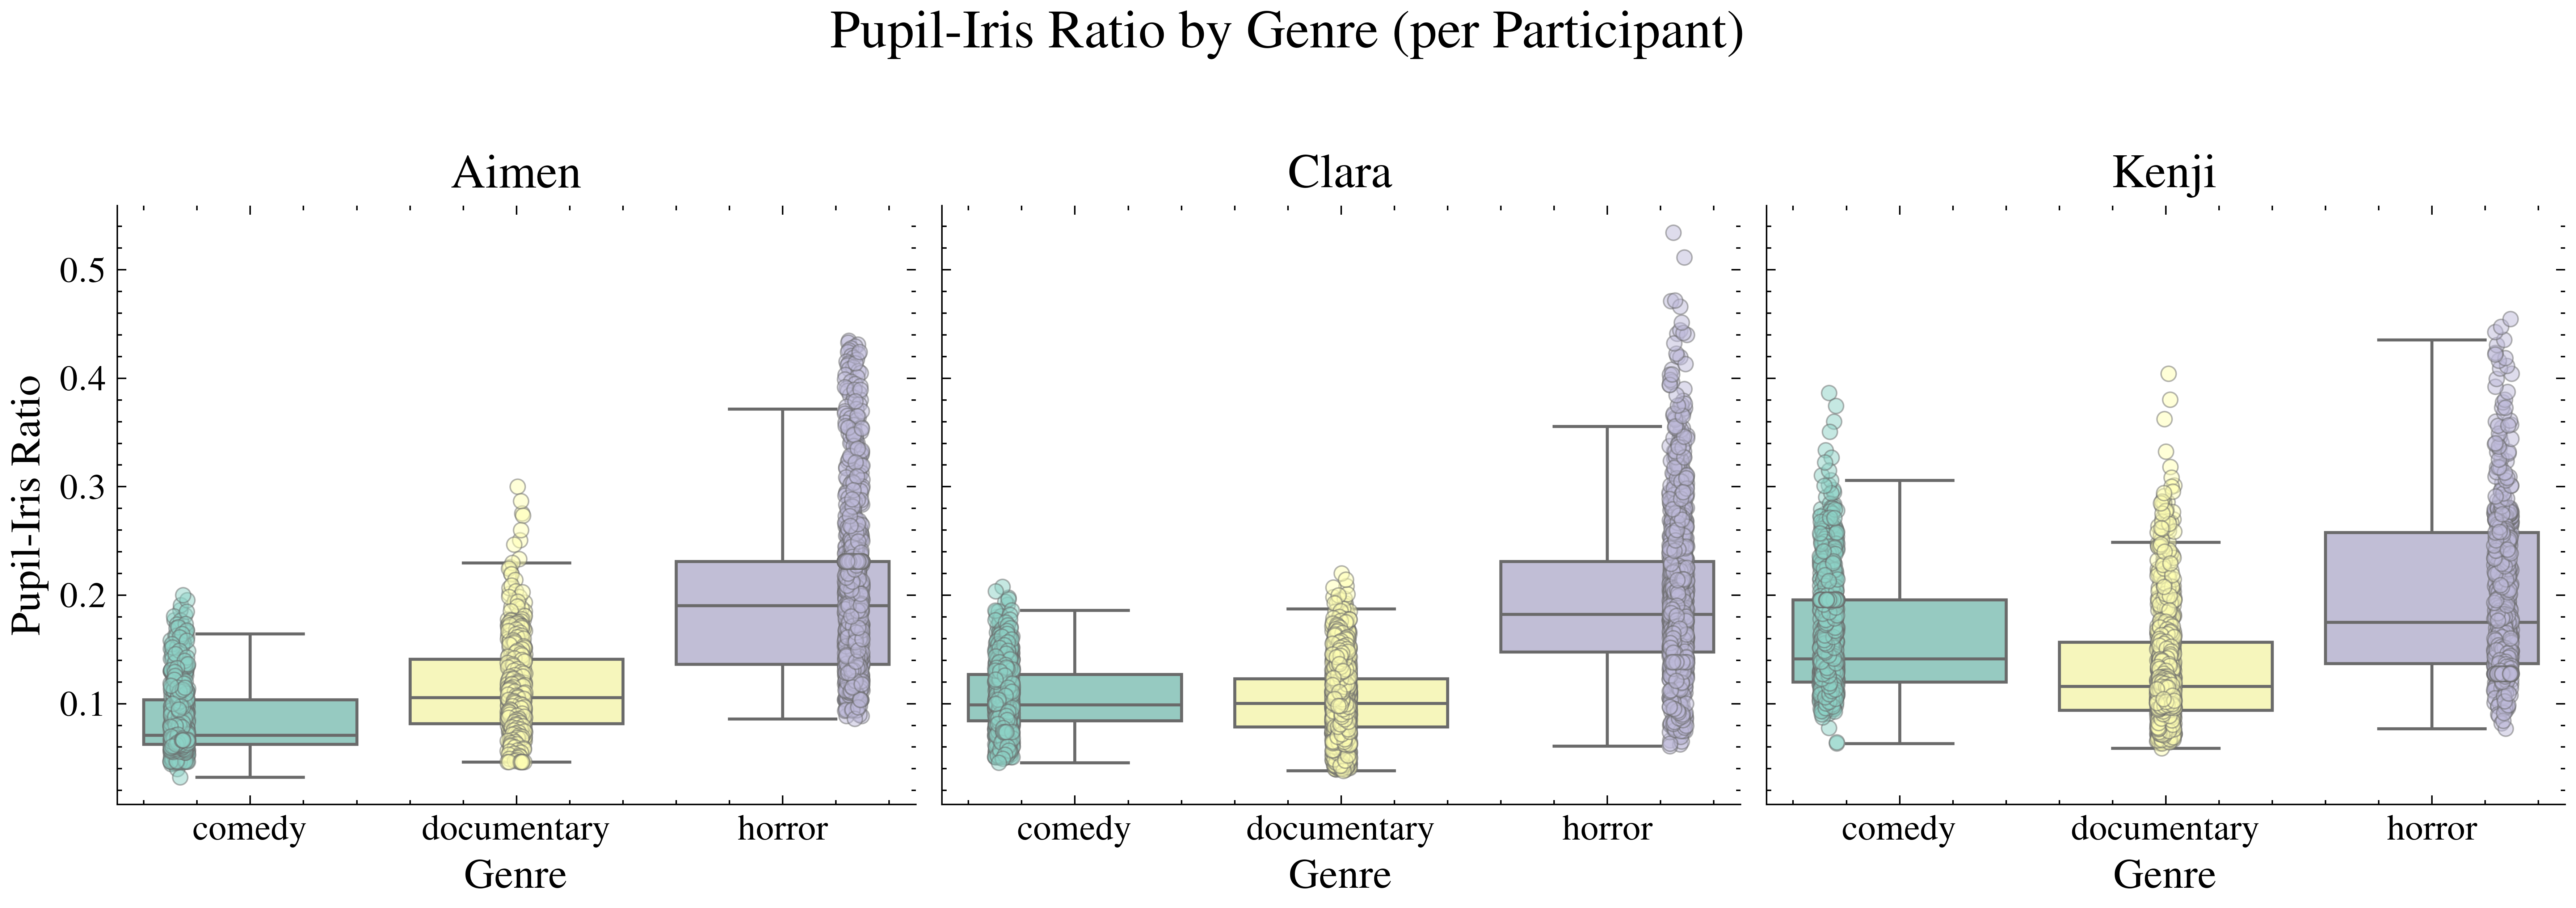

In [5]:
def plot_ps():
    # Use catplot to separate each participant into a subplot
    g = sns.catplot(
        data=df,
        x='genre',
        y='pupil_iris_ratio',
        hue='genre',
        col='participant',
        kind='box',
        palette='Set3',
        showfliers=False,
        height=4,
        aspect=1
    )
    
    # Add stripplot on top of each boxplot
    for ax, participant in zip(g.axes.flat, df['participant'].unique()):
        sns.stripplot(
            data=df[df['participant'] == participant],
            x='genre',
            y='pupil_iris_ratio',
            hue='genre',
            dodge=True,
            palette='Set3',
            alpha=0.5,
            linewidth=0.5,
            edgecolor='gray',
            ax=ax,
            legend=False  # prevent duplicate legends
        )
        ax.set_title(f'{participant.capitalize()}')
    
    # Tidy up
    g.set_axis_labels('Genre', 'Pupil-Iris Ratio')
    g.fig.suptitle('Pupil-Iris Ratio by Genre (per Participant)', y=1.05)
    plt.tight_layout()

plot_ps()

## 3. Head Movement

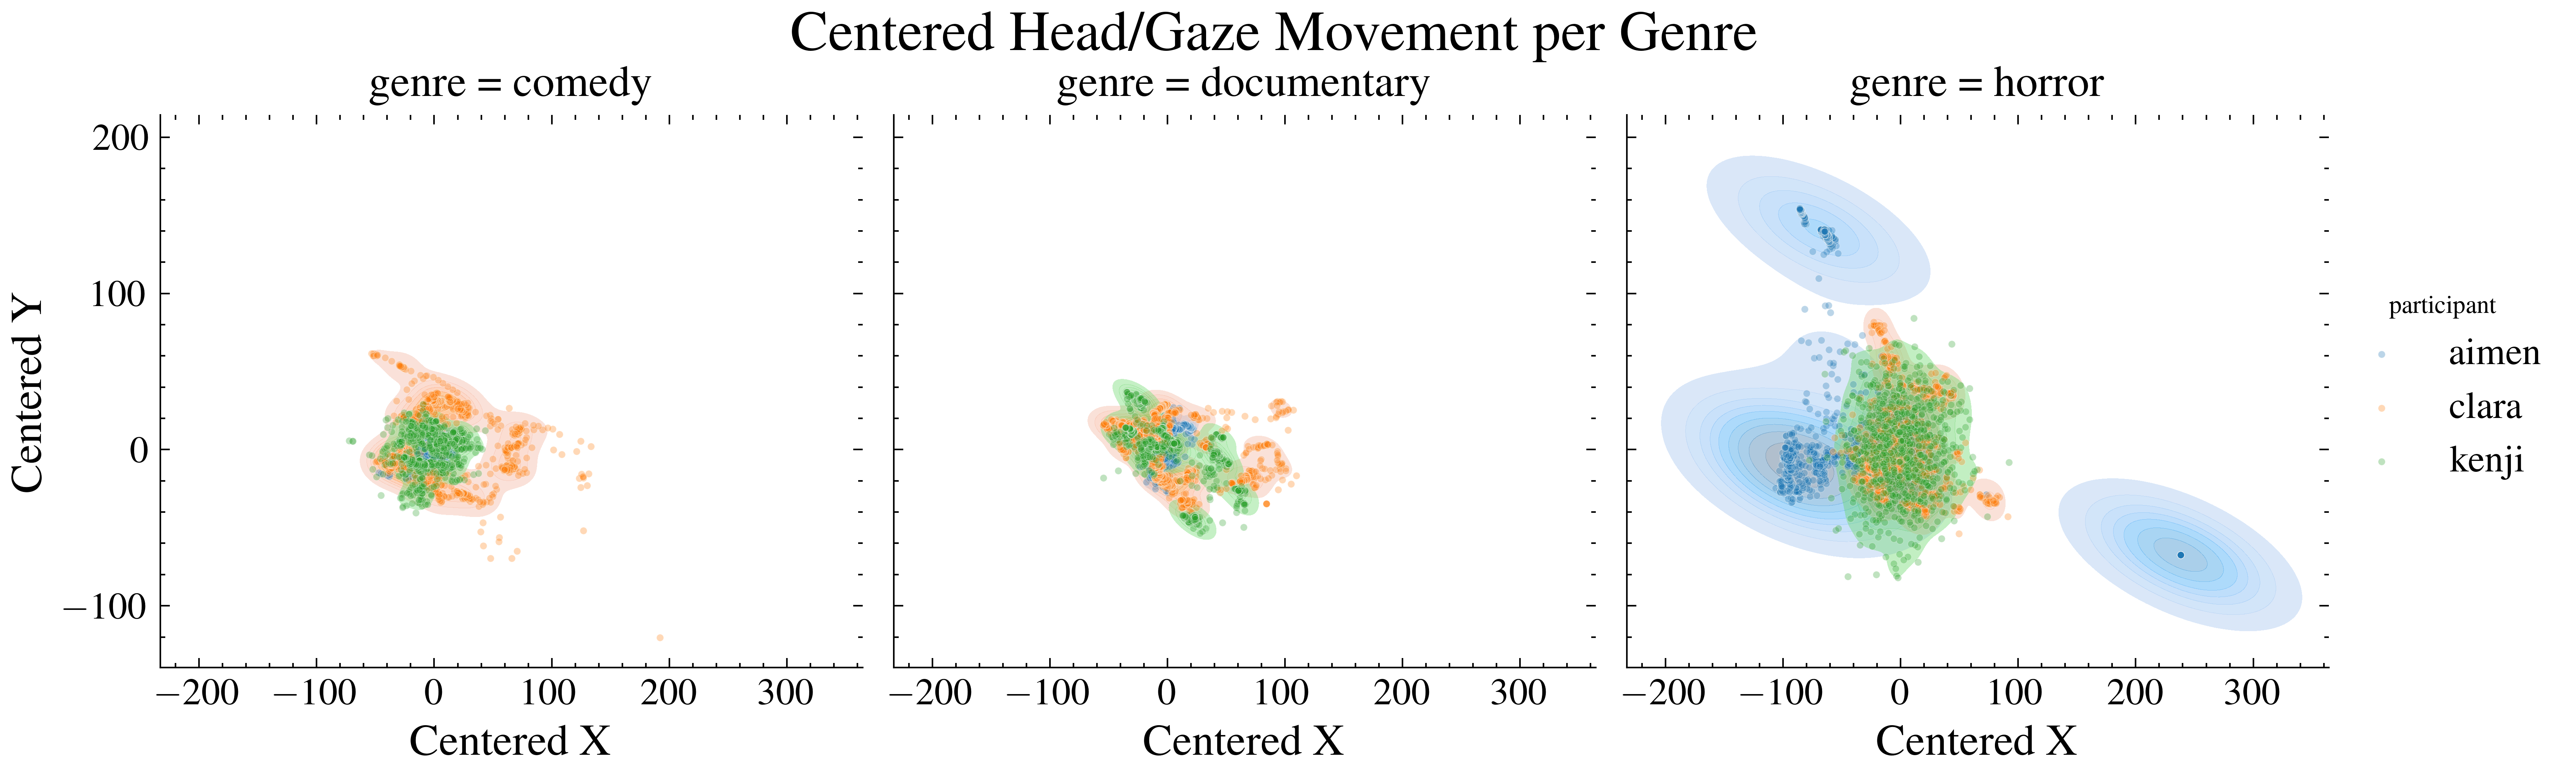

In [6]:
def plot_hm():
    # Center coordinates per participant and genre
    df_centered = df.copy()
    means = df.groupby(['participant', 'genre'])[['x_coordinate', 'y_coordinate']].transform('mean')
    df_centered['x_centered'] = df['x_coordinate'] - means['x_coordinate']
    df_centered['y_centered'] = df['y_coordinate'] - means['y_coordinate']
    
    # Use FacetGrid on centered coordinates
    g = sns.FacetGrid(df_centered, col='genre', hue='participant', palette='tab10', height=3.5, aspect=1)
    g.map_dataframe(sns.kdeplot, x='x_centered', y='y_centered', fill=True, alpha=0.4, thresh=0.05)
    g.map_dataframe(sns.scatterplot, x='x_centered', y='y_centered', s=5, alpha=0.3)
    g.set_axis_labels('Centered X', 'Centered Y')
    g.add_legend()
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle('Centered Head/Gaze Movement per Genre')
    plt.show()

plot_hm()